# Introduction

We have a meteorological (weather) data collected from 5 stations in kampala, Uganda and the weather data for the previous one day. This is a supervised, regression machine learning problem. It’s supervised because we have both the features (data for the city) and the target (particulate matter as PM2.5 in $\frac{\mu g}{m^{3}}$) that we want to predict. During training, we give the random forest both the features and the target and it must learn how to map the data to a prediction. Moreover, this is a regression task because the target value is continuous (as opposed to discrete classes in classification).

# Millstones

The following steps, as a brief guide to keep us on track, form the basis for any machine learning workflow once we have a problem and model in mind:

## Millstone-1

+ State the question and determine required data
+ Acquire the data in an accessible format
+ Identify and correct missing data points/anomalies as required
+ Prepare the data for the machine learning model

## Millstone-2

+ Establish a baseline model that you aim to exceed
+ Train the model on the training data
+ Make predictions on the test data
+ Compare predictions to the known test set targets and calculate performance metrics
+ If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique

## Millstone-3

+ Interpret model and report results visually and numerically

In [186]:
# load required laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as smf

RSEED = 42
%matplotlib inline

In [187]:
# helper function for baseline rmse

def RMSE(x,y):
    return np.sqrt(np.mean(pow((x-y),2)))    

In [188]:
# load csv file and print head of pandas dataframe

df = pd.read_csv('data/train_modelling.csv')
df.head()

,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,target
0,22.299527,0.000000,0.758530,209.574655,0.677348,45.126304
1,24.679063,0.007025,0.758058,177.109855,0.899208,79.131702
2,24.112317,0.151767,0.712944,201.373211,1.038656,32.661304
3,20.845273,1.127273,0.898326,259.973977,1.365202,53.850238
4,21.870732,0.005100,0.785134,181.944779,0.729763,177.418750


In [189]:
# check shape of dataset
df.shape

(15539, 6)

In [190]:
# describe statistaics of the dataset

df.describe()

,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,target
count,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000
mean,22.770055,0.165385,0.795056,197.791967,1.065645,58.242429
std,1.316935,0.203908,0.071238,30.992513,0.622669,42.373700
min,18.592222,0.000000,0.534513,35.228166,0.438386,1.452619
25%,21.655591,0.014593,0.753524,180.094971,0.809735,33.482625
50%,22.768363,0.094843,0.800347,196.927300,0.924415,46.504048
75%,23.705406,0.248438,0.847303,215.569387,1.088038,68.569062
max,27.549449,2.310450,0.944675,315.085561,5.733605,475.820000


In [191]:
# summary information of datatype and counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_temp          15539 non-null  float64
 1   mean_precip        15539 non-null  float64
 2   mean_rel_humidity  15539 non-null  float64
 3   mean_wind_dir      15539 non-null  float64
 4   mean_wind_spd      15539 non-null  float64
 5   target             15539 non-null  float64
dtypes: float64(6)
memory usage: 728.5 KB


In [192]:
# perform and evaluate baseline model
y_pred_baseline = np.ones(df.target.shape[0]) * np.mean(df.target)
score = RMSE(df.target,y_pred_baseline)
print(f'basline RMSE: {score.round(3)}')

basline RMSE: 42.372


In [193]:
# assign target and features

X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [194]:
# split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = RSEED)

In [195]:
# function to calculate baseline error 

def avg_baseline_err(data):
    baseline_pred = np.ones(len(data)) * np.mean(data)
    basline_err = abs(np.subtract(baseline_pred,data))
    return np.mean(basline_err)

baseline_residual = avg_baseline_err(np.array(y_test))
print(f'baseline_rsidual: {baseline_residual.round(3)}')


baseline_rsidual: 29.005


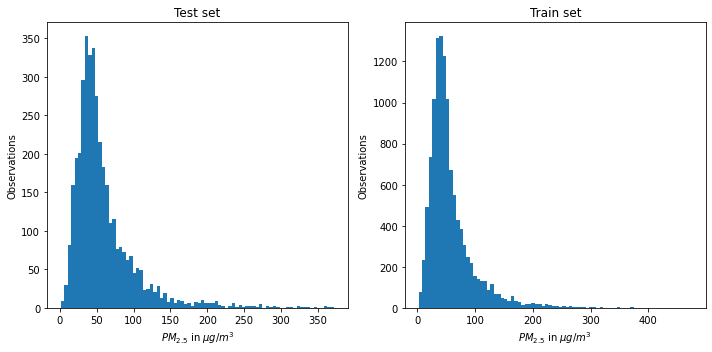

In [196]:
# plot distribution of train and test datasets

data=[y_test,y_train]
xaxes = ['$PM_{2.5}$ in $\mu g/m^3$','$PM_{2.5}$ in $\mu g/m^3$']
yaxes = ['Observations','Observations']
titles = ['Test set','Train set'] 

fig,axs = plt.subplots(1,2, figsize=(10,5))
axs = axs.ravel()
for idx,ax in enumerate(axs):
    ax.hist(data[idx], bins = 80)
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
plt.tight_layout()

# Linear Regression

In [197]:
# creart instance of linear regression model and fit (train) it with train set

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [198]:
# model coefficients or gradients (thetas)

lr.coef_

array([ -7.55220727,  -8.86381762, -75.72039278,   0.11294901,
        -4.90435158])

In [199]:
# intercept of the fitted model

lr.intercept_

274.55069995211574

In [200]:
# calculate y_hat (predicted values of the target)

y_pred_lr = lr.predict(X_test)

In [201]:
# scores output

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred_lr)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred_lr)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))}')
print(f'R_Squared: {metrics.r2_score(y_test, y_pred_lr)}')

MAE: 27.959520712589953
MSE: 1754.2365715521034
RMSE: 41.88360743240849
R_Squared: 0.055194283128565336


In [202]:
# linear regression with ordinary least square of statsmodels module

model = smf.ols(formula = 'target ~ mean_temp \
                        + mean_precip + mean_rel_humidity \
                        + mean_wind_dir + mean_wind_spd', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          2.29e-181
Time:                        23:55:11   Log-Likelihood:                -79841.
No. Observations:               15539   AIC:                         1.597e+05
Df Residuals:                   15533   BIC:                         1.597e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           283.8865     18.913     15.010      0.000     246.815     320.958
mean_temp            -7.8431      0.493    -15.922      0.000      -8.809      -6.878
mean_precip         -11.4714      1.889     -6.073      0.000     -15.174      -7.769
mean_rel_humidity   -74.5698      9.483     -7.864      0.000     -93.157     -55.982
mean_wind_dir         0.1003      0.013      7.733      0.000       0.075       0.126
mean_wind_spd        -5.3621      0.678     -7.904      0.000      -6.692      -4.032
==============================================================================
Omnibus:                     8738.363   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85531.056
Skew:                           2.561   Prob(JB):                         0.00
Kurtosis:                      13.290   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Decision Tree

In [203]:
# creart instance of decision tree regression model and fit (train) it with train set

tr = DecisionTreeRegressor()
tr.fit(X_train, y_train)

DecisionTreeRegressor()

In [204]:
# prediction or y_hat

y_pred_tr = tr.predict(X_test)

In [205]:
# print scores or evaluation metrics

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred_tr)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred_tr)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_tr))}')
print(f'R_Squared: {metrics.r2_score(y_test, y_pred_tr)}')

MAE: 21.207629472607245
MSE: 1329.1075926236376
RMSE: 36.456927909845035
R_Squared: 0.28416242585970664


# Random Forest

RMSE: 28.5235 R_sqr: 0.5618
RMSE: 28.5235 R_sqr: 0.5618
RMSE: 28.5235 R_sqr: 0.5618


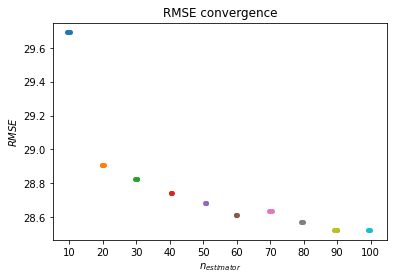

In [206]:
# function for random forest regression model

def estimator(n):
    score = []
    n_tree = []
    R_2 = []
    for i in range(n,pow(n,2)+1,10):
         
         rf = RandomForestRegressor(n_estimators = i,
                                        criterion = 'squared_error',
                                        max_depth = None,
                                        min_samples_split = 2,
                                        min_samples_leaf = 1,
                                        min_weight_fraction_leaf = 0.0,
                                        max_features = 'auto',
                                        max_leaf_nodes = None,
                                        min_impurity_decrease = 0.0,
                                        bootstrap = True,
                                        oob_score = False,
                                        n_jobs = -1,
                                        random_state = RSEED,
                                        verbose = 0,
                                        warm_start = False,
                                        ccp_alpha = 0.0,
                                        max_samples = None)
         rf.fit(X_train.values, y_train.values)
         y_pred_rf = rf.predict(X_test.values)
         
         RMSE = np.sqrt(metrics.mean_squared_error(y_test.values, y_pred_rf)).round(4)
         R_sqr = rf.score(X_test.values, y_test.values).round(4)
         score.append(RMSE)
         R_2.append(R_sqr)
         n_tree.append(i)
         
    print(f'RMSE: {min(score)} R_sqr: {R_sqr}')
    plt.title("RMSE convergence")
    plt.xlabel("$n_{estimator}$")
    plt.ylabel(r"$RMSE$")
    sns.stripplot(x = n_tree, y = score)
    
    return y_pred_rf, rf
    
# main function to create instances 

def main():
     estimator(10)
     return

if __name__=='__main__':
     main()
     y_pred_rf, rf = estimator(10)[0], estimator(10)[1]

In [207]:
# create lists of test and predicted sets

y_test_ls =[val for i, val in enumerate(y_test)]
y_pred_ls =[val for i, val in enumerate(y_pred_rf)]


# Model Performance Analysis
### Residuals and Standardized Residuals

$r_i = y_i - f(\underline{x}_i) = y_i - \widehat{y}_i$

$\tilde{r}_i = \frac{r_i}{\sqrt{{Var}(r_i)}}$


In [208]:
# calculate residuals

def my_metrics(t,p):
    my_metrics.residuals = np.array([y_test_ls[i] - y_pred_ls[i] for i in range(len(y_test_ls))])
    my_metrics.abs_residuals = abs(np.array([y_test_ls[i] - y_pred_ls[i] for i in range(len(y_test_ls))]))
    my_metrics.std_residuals = np.divide(my_metrics.residuals, np.sqrt(np.var(my_metrics.residuals)))
    return 
# create instances

my_metrics(y_test_ls,y_pred_ls)
residuals = my_metrics.residuals
abs_residuals = my_metrics.abs_residuals
std_residuals = my_metrics.std_residuals

# create ndarray
observed = np.array(y_test_ls)
predicted = np.array(y_pred_ls)

In [209]:
# create pandas dataframe

err = np.vstack((observed, predicted, residuals, abs_residuals, std_residuals))
df_err = pd.DataFrame(err.T,columns = ['observed','predicted','residuals','abs_residuals','std_residuals'])
df_err.head(10)

,observed,predicted,residuals,abs_residuals,std_residuals
0,37.692000,69.234169,-31.542169,31.542169,-1.105859
1,64.736383,75.807043,-11.070660,11.070660,-0.388134
2,46.250217,69.054095,-22.803877,22.803877,-0.799497
3,46.020870,54.670018,-8.649148,8.649148,-0.303237
4,77.952766,71.087297,6.865469,6.865469,0.240701
5,67.176364,59.302760,7.873604,7.873604,0.276046
6,19.982727,21.471955,-1.489228,1.489228,-0.052212
7,55.705000,32.816705,22.888295,22.888295,0.802457
8,51.473333,50.616914,0.856420,0.856420,0.030026
9,111.869615,85.162749,26.706866,26.706866,0.936335


# Determine Performance Metrics


### Standard deviation (std)

${\sigma ={\sqrt {{\frac {1}{N}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}},{\text{ where }}\mu ={\frac {1}{N}}\sum _{i=1}^{N}x_{i}.}$

In [210]:
# functions to calculate performance metrics

class Stats:
    
    def __init__(self, n, y):
        self.n = n
        self.y = y
    def mean(self):
        return np.divide(np.sum(self.y), self.n)
    def std(self):
        return np.sqrt(np.divide(np.sum(pow((self.y - self.mean()), 2)), self.n))
    def avg_err_baseline(self):
        predict = np.ones(len(self.y)) * self.mean()
        err = abs(np.subtract(predict, self.y))
        return np.mean(err)
        
def avg_err_model(*args):
    y = args[0]
    pred = args[1]
    errors = abs(pred - y)
    mae = np.mean(errors)
    mape = 100 * (errors/ y)
    return mae, mape

# main function to create instance of class Stats

def main():
    
    n = len(y_test)
    y = np.array(y_test)
    stats = Stats(n, y)
    model_err = avg_err_model(y_test, y_pred_rf)[0]
    MAPE = np.mean(avg_err_model(y_test, y_pred_rf)[1])
    accuracy = 100 - np.mean(avg_err_model(y_test, y_pred_rf)[1])
    mean = stats.mean()
    std = stats.std()
    
    basline_err = stats.avg_err_baseline()
    print(f'mean_observed: {mean.round(2)}')
    print(f'std_observed: {std.round(2)}')
    print(f'baseline_err: {basline_err.round(2)}°')
    print(f'model_err(MAE): {model_err.round(2)}°')
    print(f'model {((basline_err-model_err)/ basline_err * 100).round(2)}% better than baseline')
    print(f'model_accuracy: {accuracy.round(2)}%')
    print(f'MAPE: {MAPE.round(2)}°')

if __name__=='__main__':
    main()

mean_observed: 59.07
std_observed: 43.09
baseline_err: 29.01°
model_err(MAE): 17.34°
model 40.23% better than baseline
model_accuracy: 63.75%
MAPE: 36.25°


In [211]:
# describe statistics of residuals

df_err.describe()

,observed,predicted,residuals,abs_residuals,std_residuals
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,59.070538,59.274542,-0.204005,17.335363,-0.007152
std,43.095183,29.515273,28.526436,22.654072,1.000129
min,1.452619,9.851481,-111.664807,0.006097,-3.914936
25%,33.853158,39.631516,-13.194607,4.821201,-0.462599
50%,47.101489,53.304268,-3.993815,10.561893,-0.140022
75%,69.904222,71.313126,6.267526,21.003059,0.219738
max,371.926809,258.802962,284.944243,284.944243,9.990064


# Residual plots

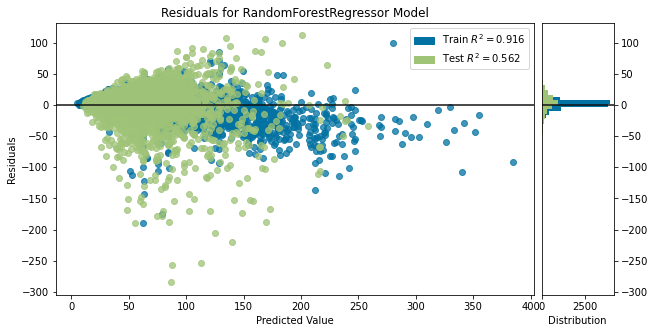

In [212]:
# residual plot 

fig = plt.figure(figsize = (10,5))
visualizer = ResidualsPlot(rf)
visualizer.fit(X_train.values, y_train.values)  
visualizer.score(X_test.values, y_test)  
visualizer.show()
plt.show()

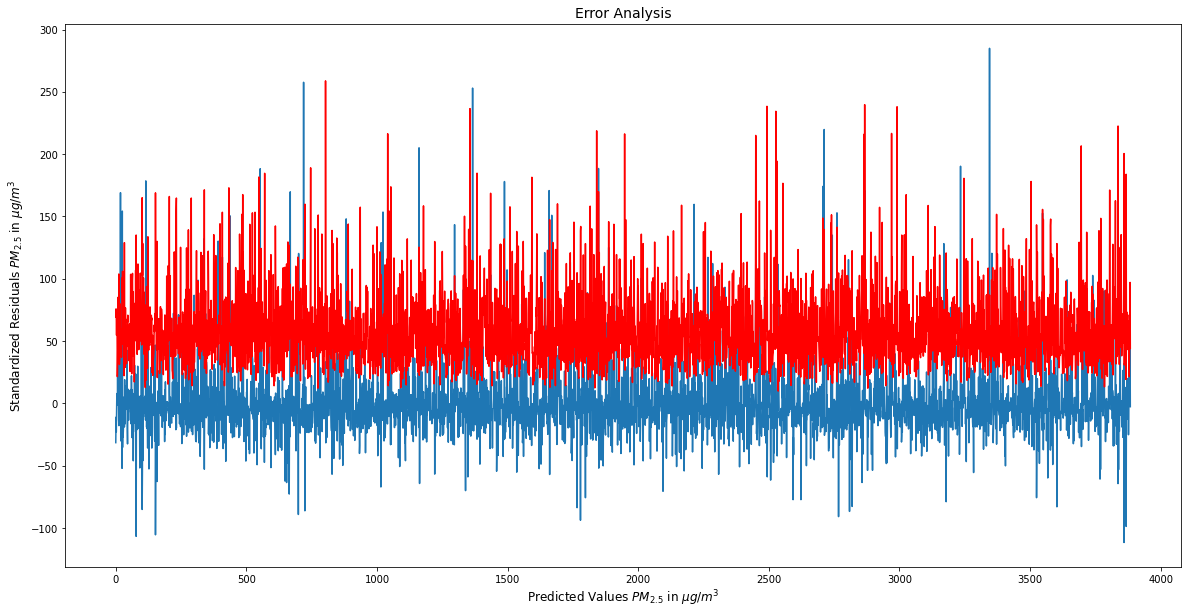

In [213]:
# residual plot

fig = plt.figure(figsize = (20,10))
plt.title('Error Analysis', fontsize=14)
plt.xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=12)
plt.ylabel('Standardized Residuals $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=12)
plt.plot(residuals)
plt.plot(y_pred_rf, color='red')
plt.show()

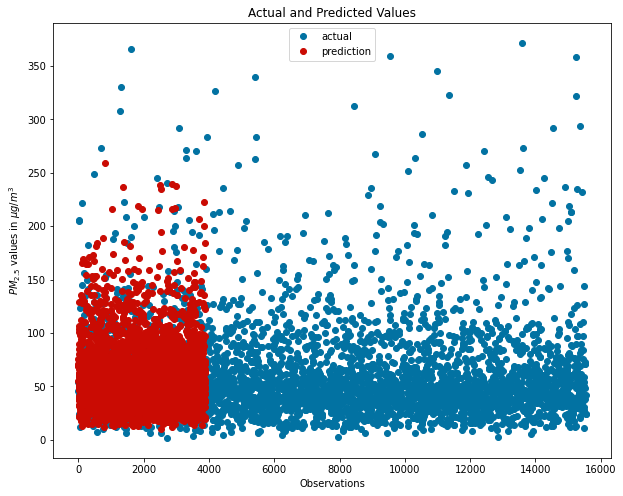

In [214]:
# plot for observations of target and predicted values

fig = plt.figure(figsize = (10,8))

# Plot the actual values
plt.plot(y_test, 'bo', label = 'actual')

# Plot the predicted values
plt.plot(y_pred_rf, 'ro', label = 'prediction') 
plt.legend()

# Graph labels
plt.xlabel('Observations')
plt.ylabel('$PM_{2.5}$ values in $\mu{g}/{m^3}$') 
plt.title('Actual and Predicted Values')
plt.show()

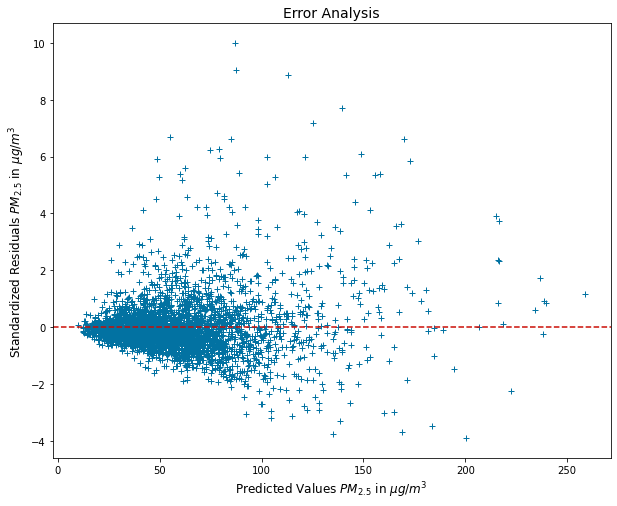

In [215]:
# plot for standardized residuals

fig = plt.figure(figsize = (10,8))
plt.title('Error Analysis', fontsize = 14)
plt.xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=12)
plt.ylabel('Standardized Residuals $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=12)
plt.scatter(y_pred_rf, std_residuals, marker = '+', linewidths = 1, color = 'b')
plt.axhline(y=0, color='r', linestyle = '--')
plt.show()

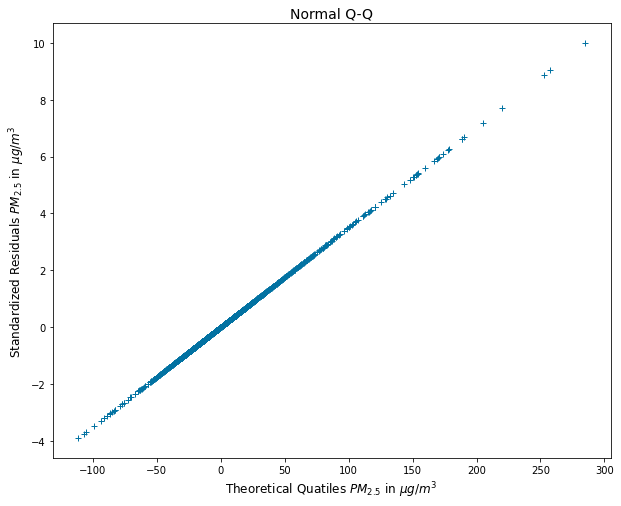

In [216]:
# plot for residual Quantile-Quantile

fig = plt.figure(figsize = (10,8))
plt.title('Normal Q-Q', fontsize = 14)
plt.xlabel('Theoretical Quatiles $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=12)
plt.ylabel('Standardized Residuals $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=12)
plt.scatter(residuals, std_residuals, marker = '+', linewidths = 1, color = 'b')
plt.show()

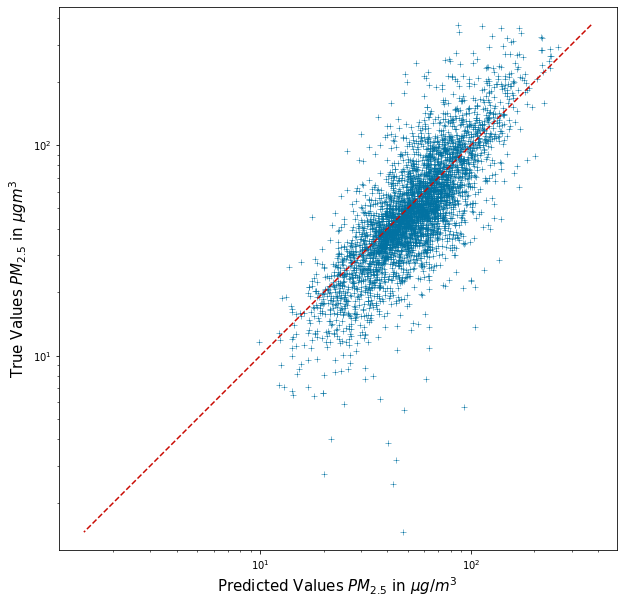

In [217]:
# log scaled plot for observed against predicted values

fig = plt.figure(figsize = (10,10))
plt.scatter(y_pred_rf, y_test, marker = '+', linewidths = 0.5, color = 'b')
plt.yscale('log')
plt.xscale('log')
ax1 = max(max(y_pred_rf), max(y_test))
ax2 = min(min(y_pred_rf), min(y_test))
plt.plot([ax1, ax2], [ax1, ax2], 'r--')
plt.xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=15)
plt.ylabel('True Values $PM_{2.5}$ in ${\mu g}{m^{3}}$', fontsize=15)
plt.axis('equal')
plt.show()

# Evaluation - Random Forest

In [218]:
# class for mean,std and variation calculation

class Score:
    def __init__(self,*args):
        self.args = args
    def mean(self):
        return [np.mean(val) for _, val in enumerate(self.args)]
    def std(self):
        return [np.std(val) for _, val in enumerate(self.args)]
    def var(self):
        return [np.divide(np.std(val), np.mean(val)) for _, val in enumerate(self.args)]

def main():
    score = Score(y_test, y_pred_tr, y_pred_rf)
    mean = score.mean()
    std = score.std()
    var = score.var()
    return mean, std 

if __name__=='__main__':
    main()
    mean = main()[0]
    std = main()[1]


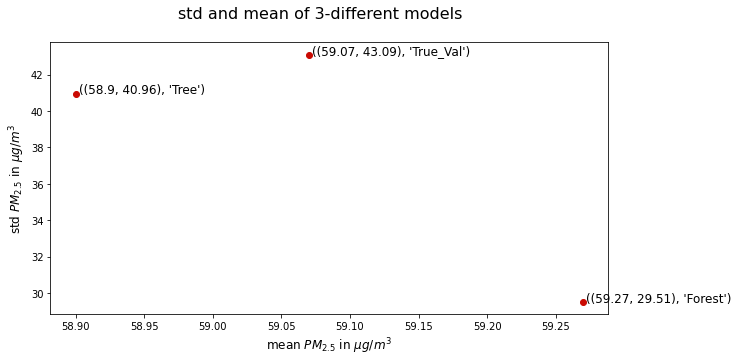

In [219]:
# function for plot annotation

def annotation(val, dict, words,mean,std):
    l = [(i.round(2), j.round(2)) for i in mean for j in std][::4]
    
    for word in words:
        x, y = val[dict[word]]
        plt.scatter(x, y, marker = 'o', color = 'r')
        plt.text(x+.002, y+.002, word, fontsize = 12)
    plt.show()

# plot std against mean values of baseline, decision tree and random forest models

fig = plt.figure(figsize = (10,5))
fig.suptitle('std and mean of 3-different models', fontsize = 16)
plt.xlabel('mean $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize = 12)
plt.ylabel('std $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize = 12)

l = [(i.round(2), j.round(2)) for i in mean for j in std][::4]
a,b,c = map(str,l)
index = [0,1,2]
name = ['True_Val','Tree','Forest']

plt_dict = dict(zip(zip(l, name), index))
text = zip(l, name)
annotation(l, plt_dict, text, mean, std)

# Feature Importance Analyis

In [220]:
# get numerical feature importances
importances = list(rf.feature_importances_)

# list of tuples with variable and importance
feature_importances = [(feature, 
                        round(importance, 3)) for feature, 
                        importance in zip(df.columns.to_list()[:5], 
                        importances)]

# sort the feature importances by most important first
feature_importances = sorted(feature_importances, 
                            key = lambda x: x[1], 
                            reverse = True)

# print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: mean_wind_spd                  Importance: 0.27
Variable: mean_wind_dir                  Importance: 0.205
Variable: mean_temp                      Importance: 0.192
Variable: mean_rel_humidity              Importance: 0.185
Variable: mean_precip                    Importance: 0.149


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


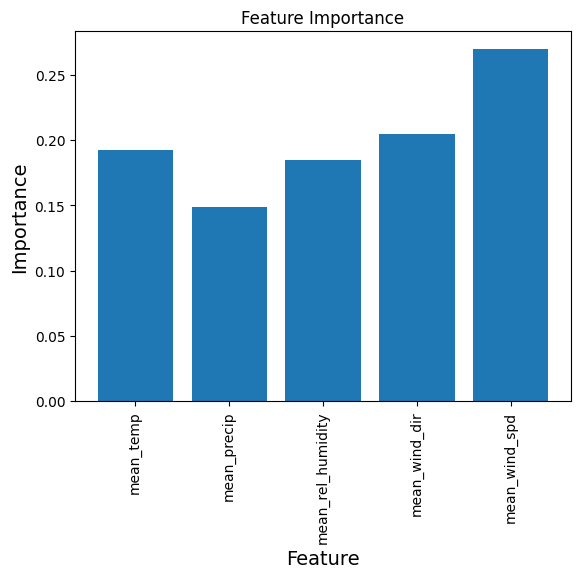

In [221]:
# plot feature imprtance 

# set the style
print(plt.style.available)
plt.style.use('default')

# list of x locations for plotting
x_values = list(range(len(importances)))

# make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# tick labels for x axis
plt.xticks(x_values, df.columns.to_list()[:5], rotation='vertical', fontsize=10)

# axis labels and title
plt.title('Feature Importance')
plt.ylabel('Importance', fontsize = 14) 
plt.xlabel('Feature', fontsize = 14)
plt.show() 
